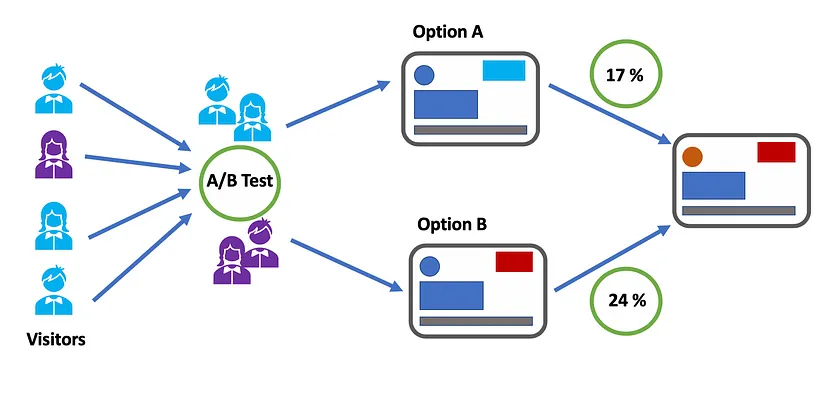

# A/B Testing Analysis

### Summary of the results:

1. **Quantity Sold:**
   - **t-statistic:** -20.33
   - **p-value:** 6.63 * 10^-89
   - **Interpretation:** The p-value is extremely low, indicating a significant difference in the quantity sold between "In-store" and "Online" purchases. The negative t-statistic suggests that on average, the quantity sold is higher for "Online" purchases.

2. **Tax Amount:**
   - **t-statistic:** 10.88
   - **p-value:** 2.38 * 10^-27
   - **Interpretation:** The p-value is also very low, indicating a significant difference in the tax amount between the two purchase types. The positive t-statistic suggests that the tax amount is higher for "In-store" purchases.

3. **Profit:**
   - **t-statistic:** -16.16
   - **p-value:** 1.47 * 10^-57
   - **Interpretation:** The p-value indicates a significant difference in profit between "In-store" and "Online" purchases. The negative t-statistic suggests that profit is higher for "Online" purchases.

#### Insights:

- **Online purchases** tend to have higher quantities sold and generate more profit, while **In-store purchases** are associated with higher tax amounts.
- The significant differences suggest that the purchase channel (In-store vs. Online) has a meaningful impact on sales performance, which can inform strategies around pricing, promotions, and inventory management.

These insights could be valuable for making data-driven decisions regarding sales and marketing strategies.

### importing necessary libraries

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [2]:
ab_data = pd.read_excel('ab_dataset.xlsx')

## Basic EDA

In [3]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35783 entries, 0 to 35782
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                35783 non-null  datetime64[ns]
 1   Time (Hr/Min)       35783 non-null  object        
 2   Customer Age Range  35783 non-null  object        
 3   Product Type        35783 non-null  object        
 4   Product Category    35783 non-null  object        
 5   Product Name        35783 non-null  object        
 6   Purchase Type       35783 non-null  object        
 7   Country             35783 non-null  object        
 8   City                35783 non-null  object        
 9   Gender              35783 non-null  object        
 10  Xmas Budget         35783 non-null  object        
 11  Payment Method      35783 non-null  object        
 12  Quantity            35783 non-null  int64         
 13  Unit Price          35783 non-null  float64   

In [4]:
ab_data.describe()

,Date,Quantity,Unit Price,Tax Amount,Unit Cost,Cost,Total Sales,Profit
count,35783,35783.000000,35783.000000,35783.000000,35783.000000,35783.000000,35783.000000,35783.000000
mean,2020-05-16 03:11:01.889724160,3.918341,154.909384,11.719472,38.731088,151.708727,658.672076,506.963348
min,2018-01-01 00:00:00,1.000000,10.020000,0.250000,2.510000,2.510000,10.320000,7.800000
25%,2019-01-17 00:00:00,1.000000,82.625000,4.050000,20.660000,38.175000,162.255000,124.020000
50%,2020-01-22 00:00:00,2.000000,154.430000,7.760000,38.610000,71.910000,306.740000,235.440000
75%,2021-01-26 00:00:00,4.000000,227.555000,15.790000,56.890000,160.965000,700.450000,540.300000
max,2022-01-28 00:00:00,30.000000,300.000000,44.990000,75.000000,2237.700000,9765.000000,7545.600000
std,NaN,5.006589,83.684850,10.417704,20.921232,235.290986,1022.050951,787.182664


**Checking for null values**

In [5]:
ab_data.isna().sum()

Date                  0
Time (Hr/Min)         0
Customer Age Range    0
Product Type          0
Product Category      0
Product Name          0
Purchase Type         0
Country               0
City                  0
Gender                0
Xmas Budget           0
Payment Method        0
Quantity              0
Unit Price            0
Tax Amount            0
Unit Cost             0
Cost                  0
Total Sales           0
Profit                0
dtype: int64

### Spliting the data into two groups based on Purchase Type

In [6]:
in_store = ab_data[ab_data['Purchase Type'] == 'In-store']
online = ab_data[ab_data['Purchase Type'] == 'Online']

In [7]:
in_store.head()

,Date,Time (Hr/Min),Customer Age Range,Product Type,Product Category,Product Name,Purchase Type,Country,City,Gender,Xmas Budget,Payment Method,Quantity,Unit Price,Tax Amount,Unit Cost,Cost,Total Sales,Profit
0,2021-01-05,08:53,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Italy,Venice,Female,Low,Cash,1,232.73,5.82,58.19,58.19,238.55,180.36
1,2020-01-11,18:47,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Netherlands,Amsterdam,Female,Low,Cash,1,130.23,3.26,32.56,32.56,133.49,100.93
2,2019-01-01,08:20,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Austria,Salzburg,Female,Low,Cash,1,233.26,5.83,58.32,58.32,239.09,180.77
3,2019-01-10,15:40,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,France,Lyon,Female,Low,Cash,1,211.53,5.29,52.89,52.89,216.82,163.93
4,2021-01-24,17:16,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Italy,Naples,Male,Low,Cash,1,85.62,2.14,21.41,21.41,87.76,66.35


In [8]:
online.head()

,Date,Time (Hr/Min),Customer Age Range,Product Type,Product Category,Product Name,Purchase Type,Country,City,Gender,Xmas Budget,Payment Method,Quantity,Unit Price,Tax Amount,Unit Cost,Cost,Total Sales,Profit
30495,2021-11-19,00:39,1 to 11,Children,Building Sets,LEGO Star Wars Set,Online,Belgium,Ghent,Female,Low,Credit Card,30,196.41,9.82,49.11,1473.30,6186.90,4713.60
30496,2018-11-01,00:57,1 to 11,Children,Toys,Barbie Doll,Online,Portugal,Lisbon,Male,Medium,Credit Card,25,61.59,3.08,15.40,385.00,1616.75,1231.75
30497,2020-11-09,08:23,1 to 11,Children,Puzzles,Harry Potter Puzzle,Online,Portugal,Lisbon,Female,Medium,Credit Card,25,88.26,4.41,22.07,551.75,2316.75,1765.00
30498,2019-11-19,01:48,1 to 11,Children,Toys,Barbie Doll,Online,Netherlands,Utrecht,Male,High,Credit Card,25,187.86,9.39,46.97,1174.25,4931.25,3757.00
30499,2018-11-16,14:37,18 over,Adult,Wearable Tech,Fitbit Inspire,Online,Poland,Lodz,Female,Low,Credit Card,25,64.27,3.21,16.07,401.75,1687.00,1285.25


### Performing t-tests to compare the means of Quantity, Tax Amount, and Profit

In [9]:
quantity_test = stats.ttest_ind(in_store['Quantity'], online['Quantity'], equal_var=False)
tax_test = stats.ttest_ind(in_store['Tax Amount'], online['Tax Amount'], equal_var=False)
profit_test = stats.ttest_ind(in_store['Profit'], online['Profit'], equal_var=False)

### Displaying the results

In [10]:
print("\033[1mResults:\033[0m\n")
print("\033[1mQuantity Sold T-test:\033[0m", quantity_test, '\n')
print("\033[1mTax Amount T-test:\033[0m", tax_test, '\n')
print("\033[1mProfit T-test:\033[0m", profit_test, '\n')

Results:

Quantity Sold T-test: TtestResult(statistic=-20.32876007434045, pvalue=6.63214657423095e-89, df=6006.541199317311) 

Tax Amount T-test: TtestResult(statistic=10.876452431881368, pvalue=2.3777567525021837e-27, df=7561.493390254498) 

Profit T-test: TtestResult(statistic=-16.163222470908597, pvalue=1.4723374931062936e-57, df=6018.7453379112585) 



In [11]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

### Boxplot for Quantity

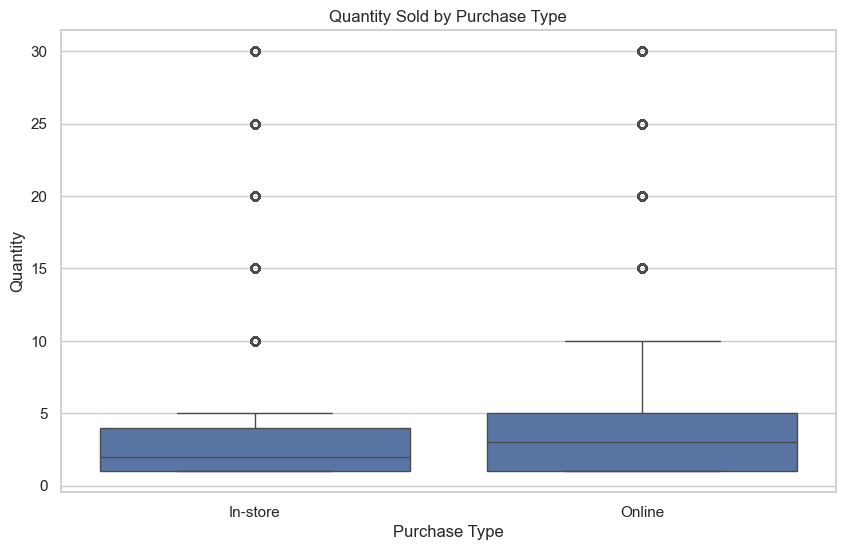

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase Type', y='Quantity', data=ab_data)
plt.title('Quantity Sold by Purchase Type')
plt.show()

**Quantity Sold by Purchase Type:**

The boxplot indicates that "Online" purchases generally have higher quantities sold compared to "In-store" purchases. The median quantity for "Online" purchases is slightly higher, and the spread of the data (interquartile range) is also larger, indicating more variability in the quantities sold online. There are some outliers in both categories, but "Online" has more outliers with higher quantities.

### Boxplot for Tax Amount

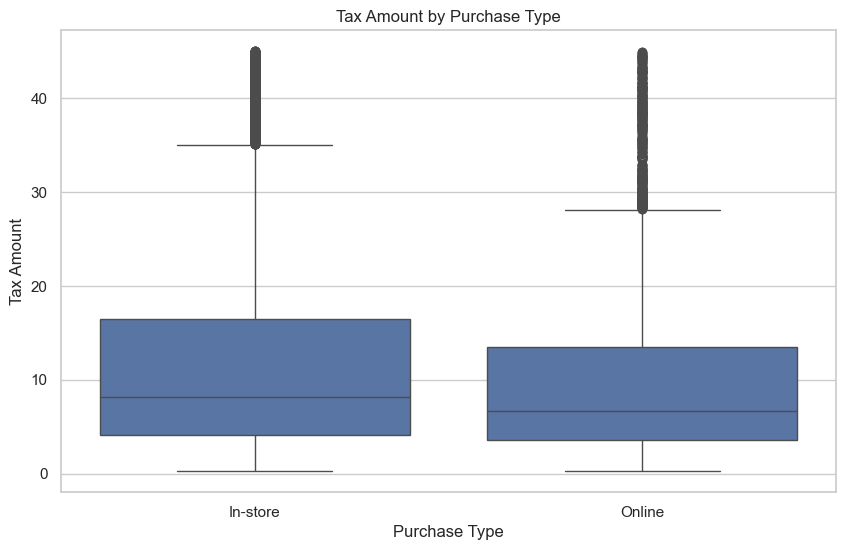

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase Type', y='Tax Amount', data=ab_data)
plt.title('Tax Amount by Purchase Type')
plt.show()

**Tax Amount by Purchase Type:**

The tax amount is generally higher for "In-store" purchases, as indicated by the median and the spread. The "In-store" purchases show a wider range of tax amounts, with several high outliers. "Online" purchases, on the other hand, have a narrower range but still include some high outliers.

### Boxplot for Profit

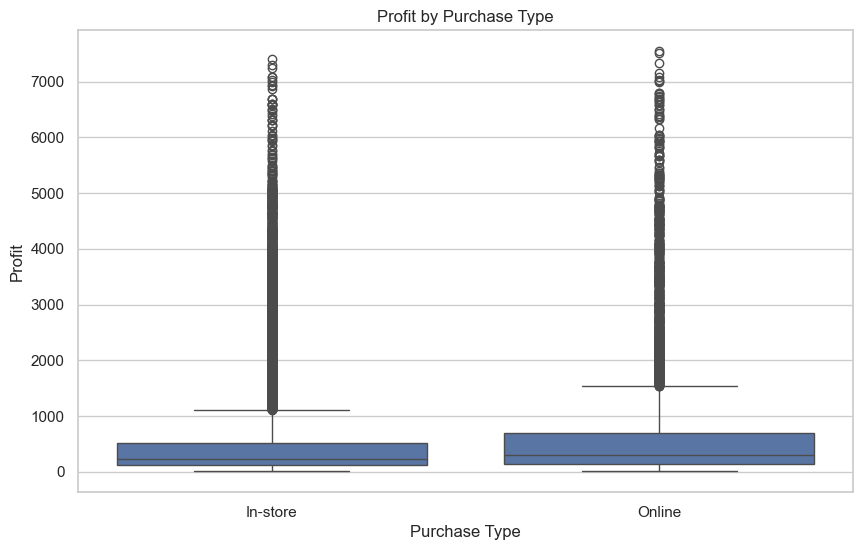

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase Type', y='Profit', data=ab_data)
plt.title('Profit by Purchase Type')
plt.show()

**Profit by Purchase Type:**

The profit generated by "Online" purchases appears significantly higher, as shown by the boxplot. The "Online" category has a higher median profit and a greater number of extreme outliers, suggesting that some online transactions generate very high profits. The "In-store" purchases have lower median profits with fewer extreme outliers.

### Bar plot for Mean Values

<Figure size 1000x600 with 0 Axes>

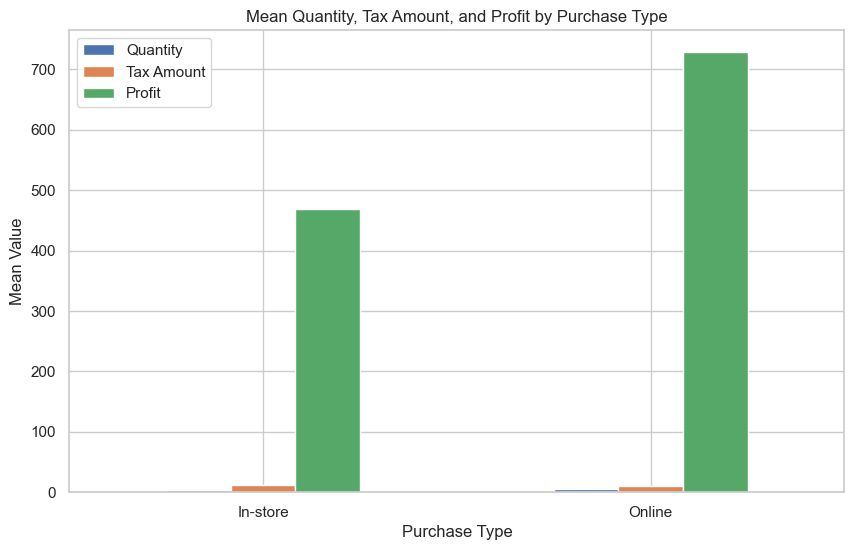

In [15]:
# Calculate the mean for relevant numeric columns and plot
ab_grouped = ab_data.groupby('Purchase Type')[['Quantity', 'Tax Amount', 'Profit']].mean()

plt.figure(figsize=(10, 6))
ab_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Quantity, Tax Amount, and Profit by Purchase Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

**Mean Quantity, Tax Amount, and Profit by Purchase Type:**

The bar plot shows that the mean profit for "Online" purchases is much higher than for "In-store" purchases. The mean tax amount is also higher for "In-store" purchases, aligning with the previous boxplot observations. The quantity sold is relatively small in both cases but slightly higher on average for "Online" purchases.

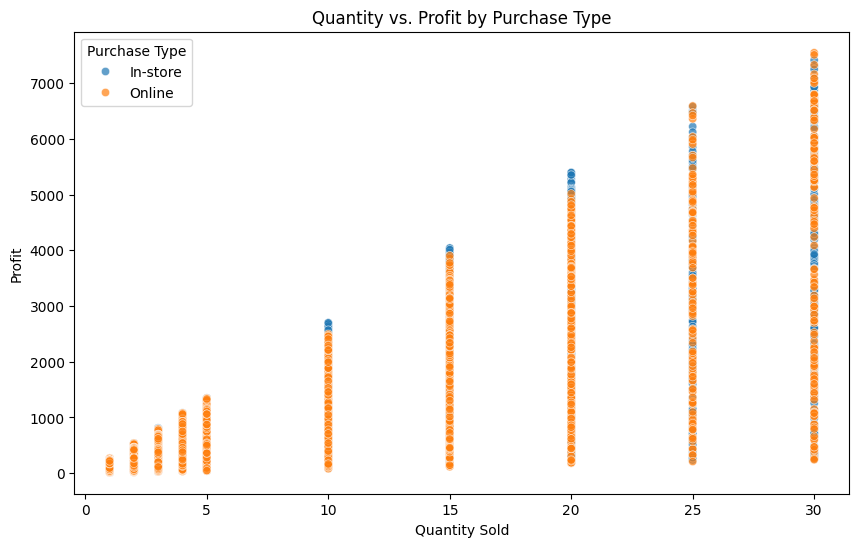

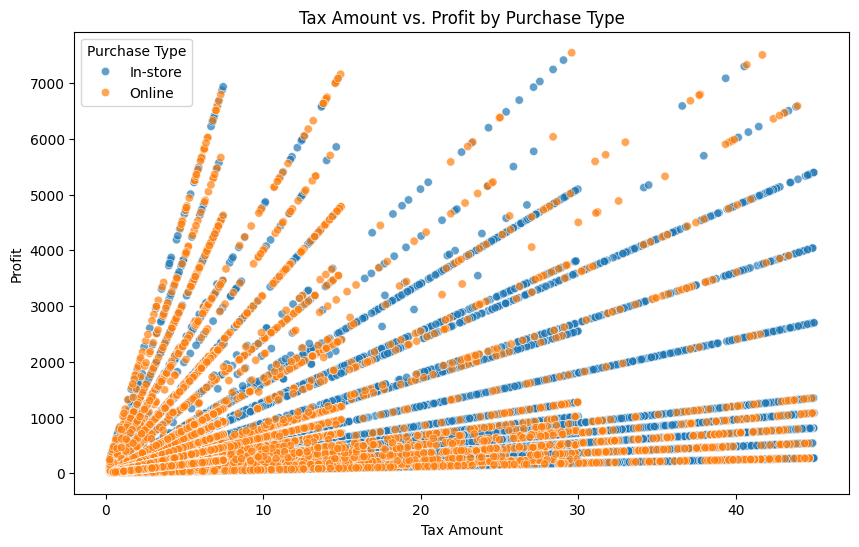

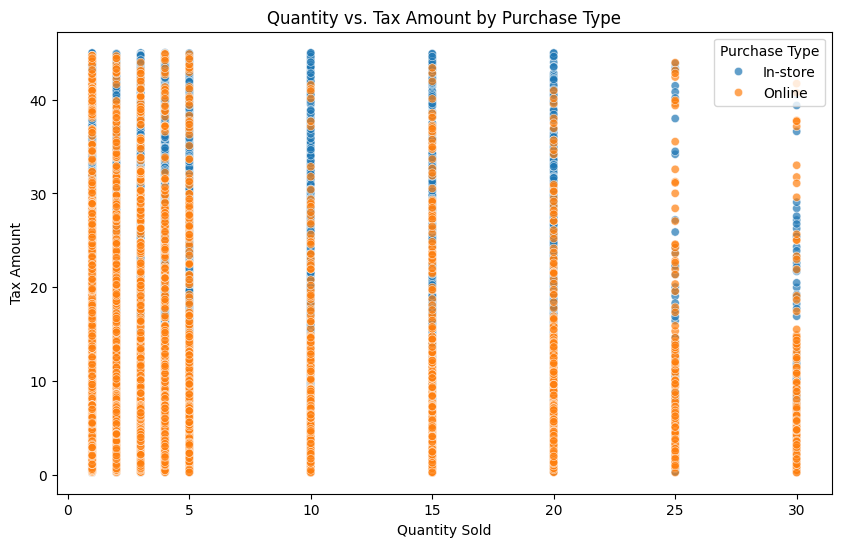

In [13]:
# Run this for scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Quantity vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Profit', hue='Purchase Type', data=ab_data, alpha=0.7)
plt.title('Quantity vs. Profit by Purchase Type')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.legend(title='Purchase Type')
plt.show()

# Scatter plot for Tax Amount vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tax Amount', y='Profit', hue='Purchase Type', data=ab_data, alpha=0.7)
plt.title('Tax Amount vs. Profit by Purchase Type')
plt.xlabel('Tax Amount')
plt.ylabel('Profit')
plt.legend(title='Purchase Type')
plt.show()

# Scatter plot for Quantity vs. Tax Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Tax Amount', hue='Purchase Type', data=ab_data, alpha=0.7)
plt.title('Quantity vs. Tax Amount by Purchase Type')
plt.xlabel('Quantity Sold')
plt.ylabel('Tax Amount')
plt.legend(title='Purchase Type')
plt.show()
